In [ ]:
import pandas as pd
import numpy as np

In [ ]:
## Reading Data
data = pd.read_csv("https://raw.githubusercontent.com/tripathiaakash/ML_Course/main/heart.csv")

In [ ]:
## Viewing the head of the data frame
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Data contains;**

age - age in years

sex - (1 = male; 0 = female)

cp - chest pain type

trestbps - resting blood pressure (in mm Hg on admission to the hospital)

chol - serum cholestoral in mg/dl

fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg - resting electrocardiographic results

thalach - maximum heart rate achieved

exang - exercise induced angina (1 = yes; 0 = no)

oldpeak - ST depression induced by exercise relative to rest

slope - the slope of the peak exercise ST segment

ca - number of major vessels (0-3) colored by flourosopy

thal - 3 = normal; 6 = fixed defect; 7 = reversable defect

target - have disease or not (1=yes, 0=no)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## **EDA**

In [ ]:
data.shape

(303, 14)

In [ ]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

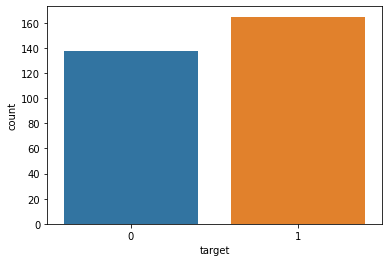

In [ ]:
sns.countplot(x="target", data=data)
plt.show()

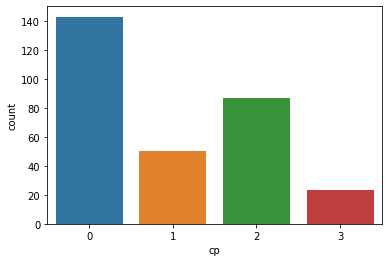

In [ ]:
sns.countplot(x = data.cp)

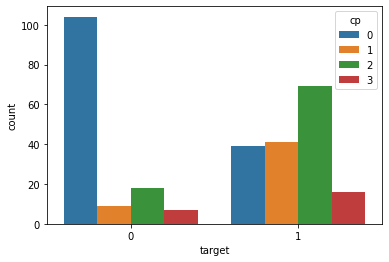

In [ ]:
sns.countplot(x=data.target,hue=data.cp)

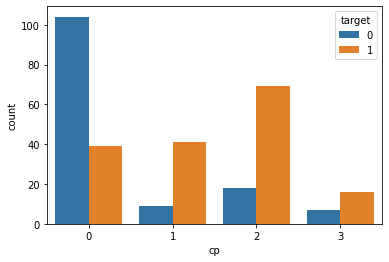

In [ ]:
sns.countplot(x=data.cp,hue=data.target)

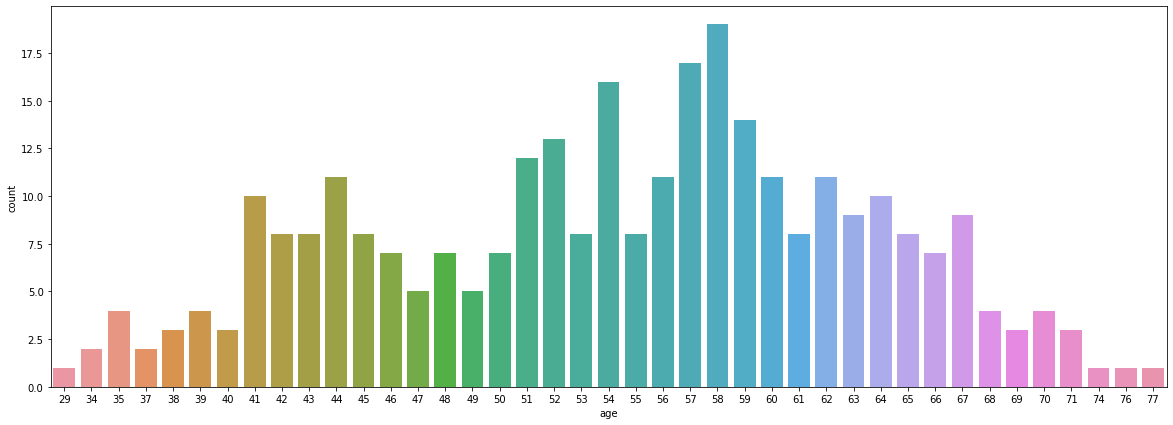

In [ ]:
ax = plt.subplots(figsize = (20,7))
ax=sns.countplot(x = data.age)

Text(0.5, 1.0, 'Age disributation for target value')

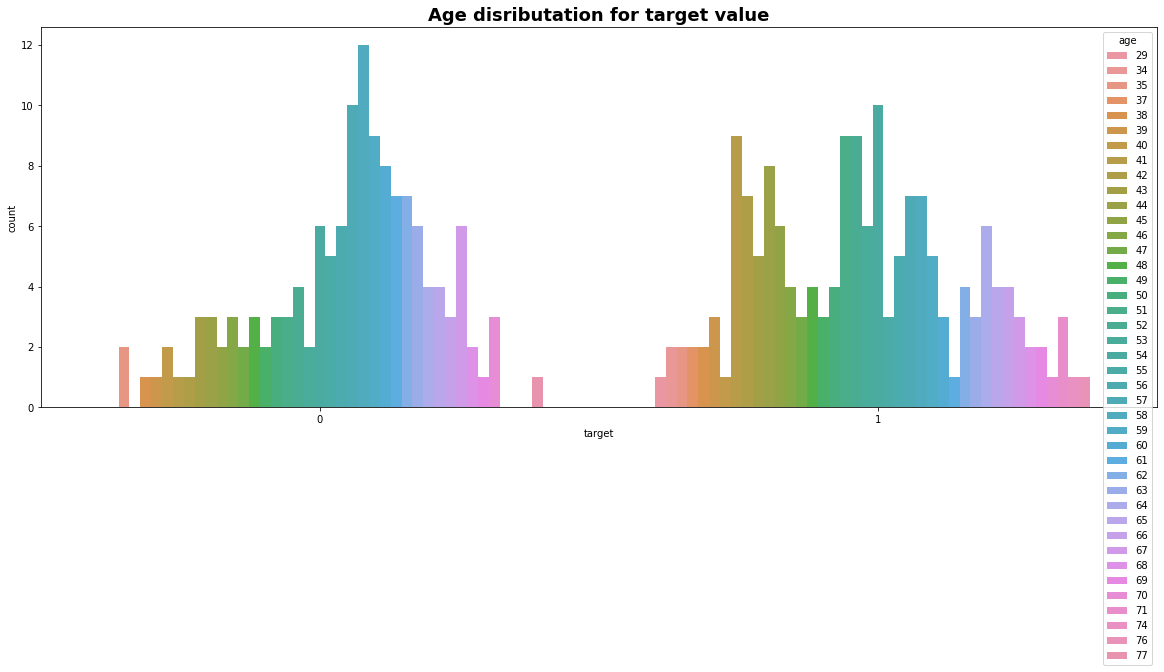

In [ ]:
ax = plt.subplots(figsize = (20,7))
ax=sns.countplot(x = data.target,hue = data.age)
ax.set_title('Age disributation for target value',fontsize = 18, fontweight='bold' )

Text(0, 0.5, 'Frequency')

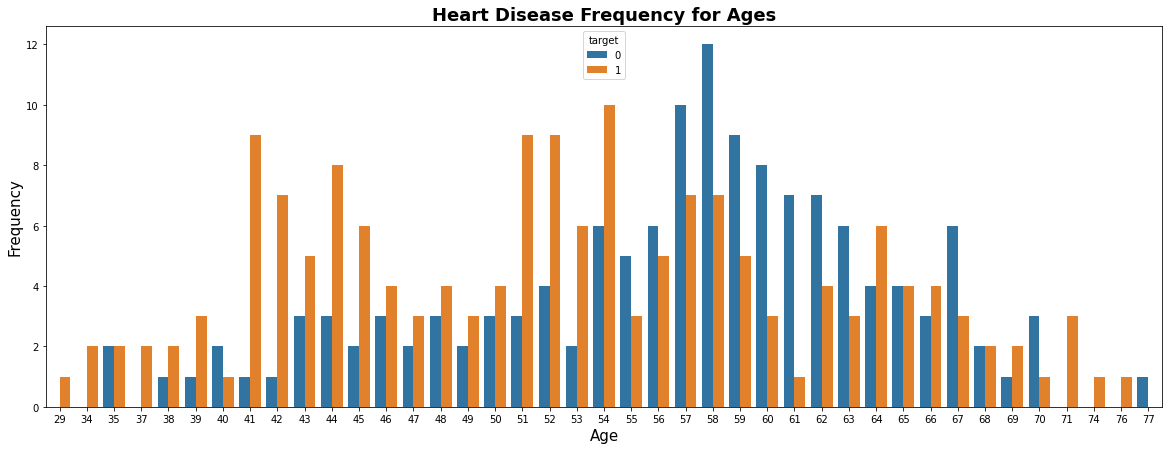

In [ ]:
countplt, ax = plt.subplots(figsize = (20,7))
ax = sns.countplot(hue = data.target,x = data.age)
ax.set_title('Heart Disease Frequency for Ages',fontsize = 18, fontweight='bold' )
ax.set_xlabel('Age', fontsize = 15)
ax.set_ylabel('Frequency', fontsize = 15)

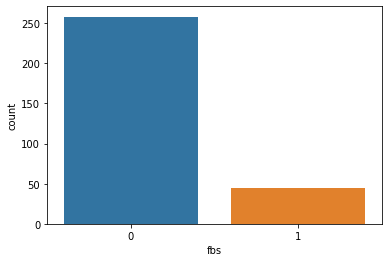

In [ ]:
sns.countplot(x=data.fbs)

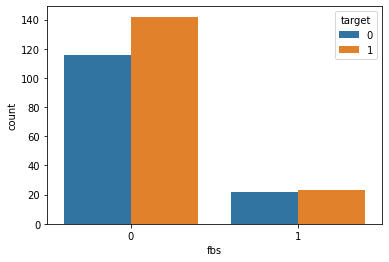

In [ ]:
sns.countplot(x=data.fbs,hue=data.target)

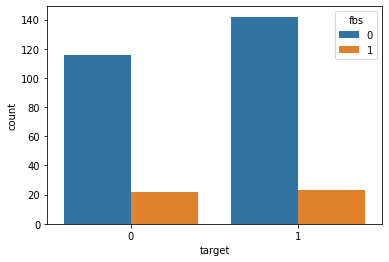

In [ ]:
sns.countplot(hue=data.fbs,x=data.target)

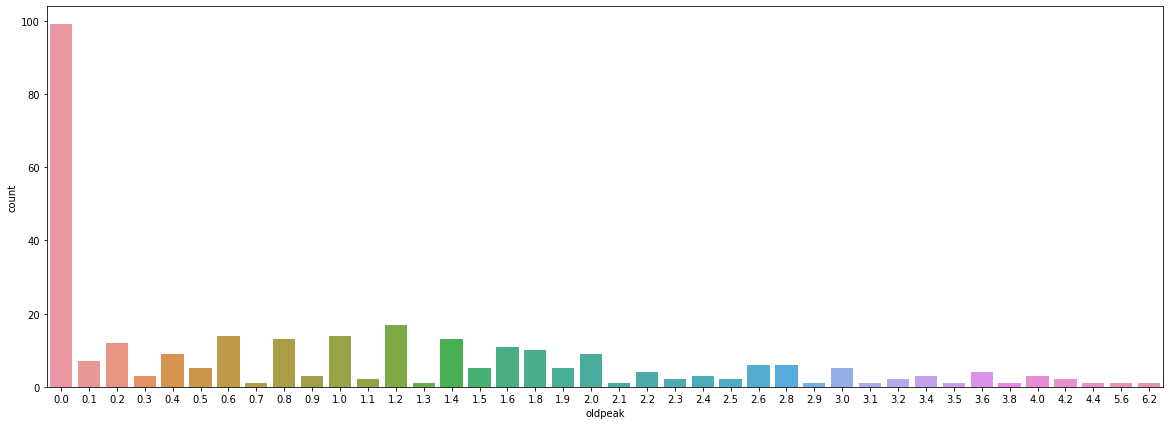

In [ ]:
ax = plt.subplots(figsize = (20,7))
ax=sns.countplot(x=data.oldpeak)

Text(0.5, 1.0, 'oldpeak disributation for target value')

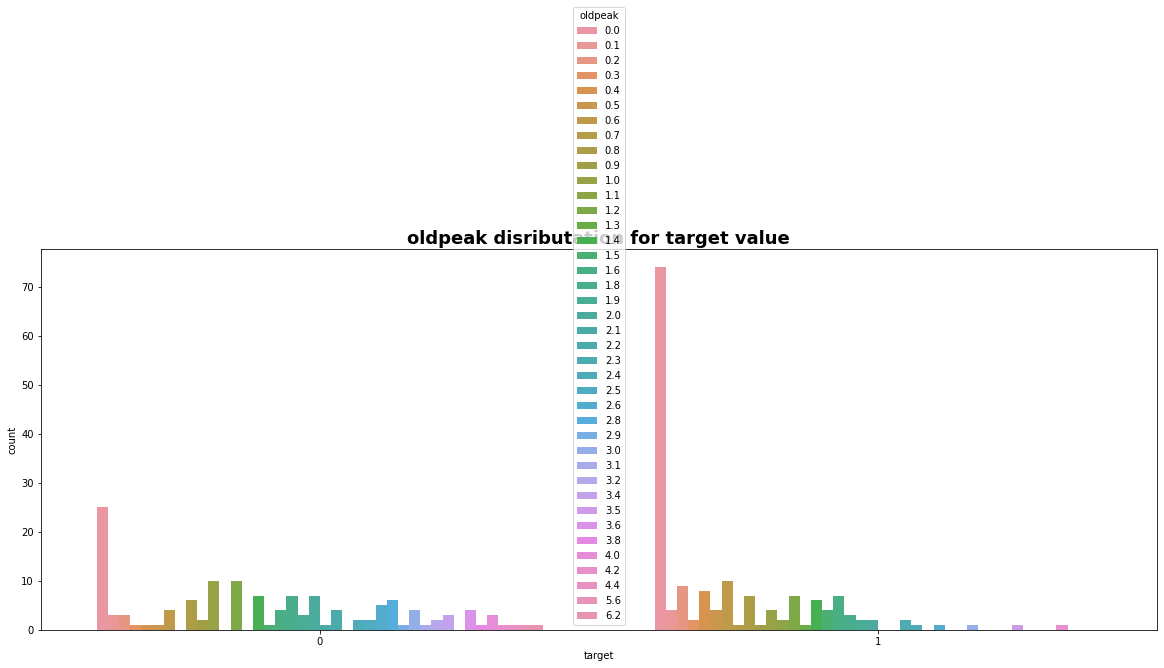

In [ ]:
ax = plt.subplots(figsize = (20,7))
ax=sns.countplot(x = data.target,hue = data.oldpeak)
ax.set_title('oldpeak disributation for target value',fontsize = 18, fontweight='bold' )

Text(0, 0.5, 'Frequency')

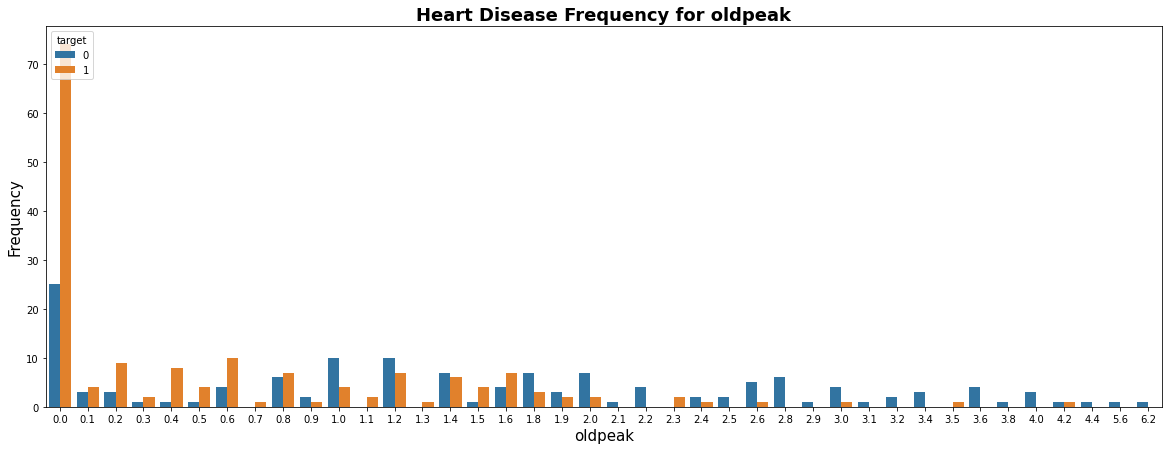

In [ ]:
countplt, ax = plt.subplots(figsize = (20,7))
ax = sns.countplot(hue = data.target,x = data.oldpeak)
ax.set_title('Heart Disease Frequency for oldpeak',fontsize = 18, fontweight='bold' )
ax.set_xlabel('oldpeak', fontsize = 15)
ax.set_ylabel('Frequency', fontsize = 15)

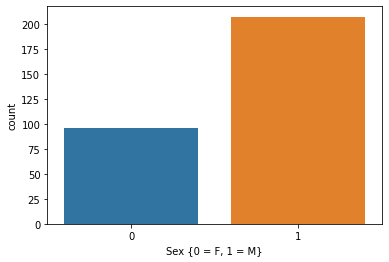

In [ ]:
sns.countplot(x='sex', data=data)
plt.xlabel("Sex {0 = F, 1 = M}")
plt.show()

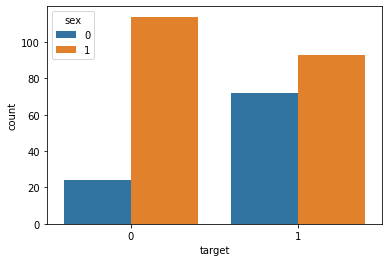

In [ ]:
sns.countplot(x=data.target,hue=data.sex)

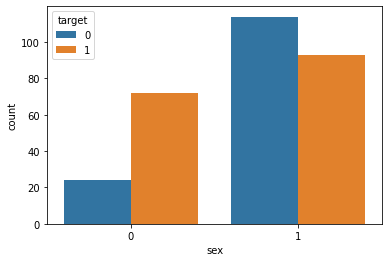

In [ ]:
sns.countplot(hue=data.target,x=data.sex)

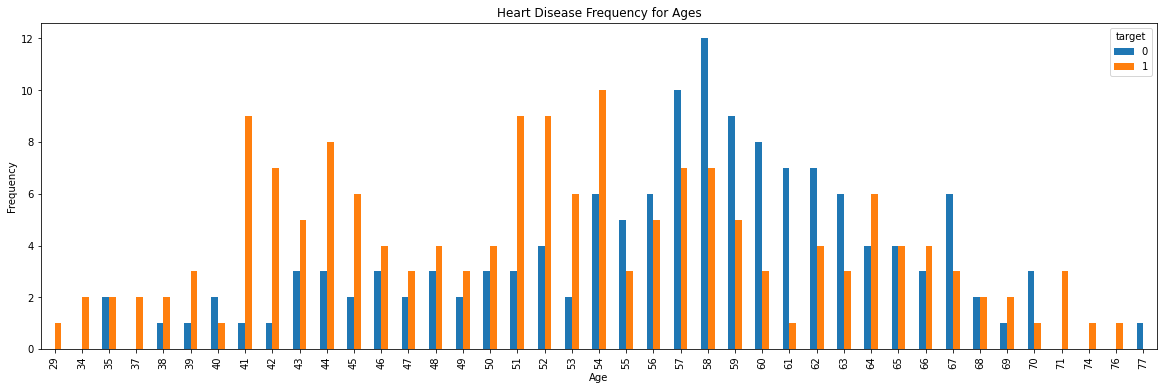

In [ ]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

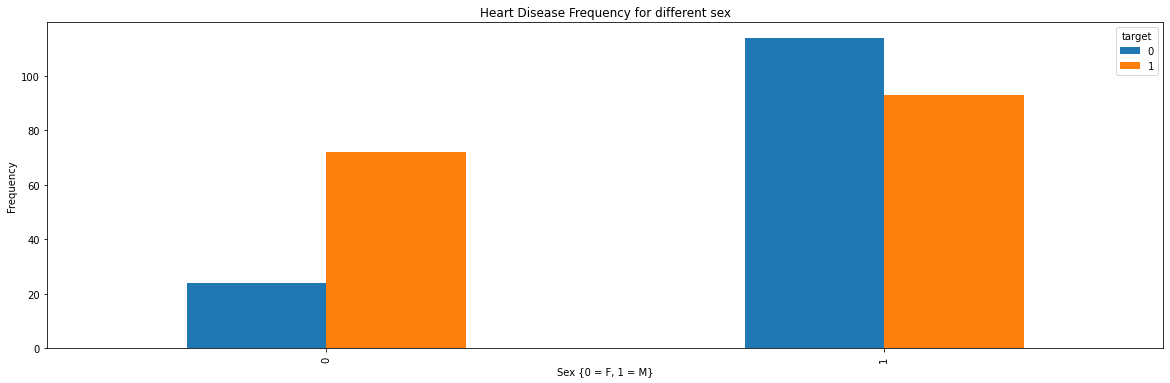

In [ ]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for different sex')
plt.xlabel('Sex {0 = F, 1 = M}')
plt.ylabel('Frequency')
plt.show()

Create One Hot Encoding Vectors

In [ ]:
data['cp'].unique()

array([3, 2, 1, 0])

In [ ]:
data['cp']

0      3
1      2
2      1
3      1
4      0
      ..
298    0
299    3
300    0
301    0
302    1
Name: cp, Length: 303, dtype: int64

In [ ]:
a = pd.get_dummies(data['cp'], prefix = "cp")
b = pd.get_dummies(data['thal'], prefix = "thal")
c = pd.get_dummies(data['slope'], prefix = "slope")

In [ ]:
b

,thal_0,thal_1,thal_2,thal_3
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
298,0,0,0,1
299,0,0,0,1
300,0,0,0,1
301,0,0,0,1


In [ ]:
frames = [data, a, b, c]
data = pd.concat(frames, axis = 1)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1


In [ ]:
data.columns.values

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target',
       'cp_0', 'cp_1', 'cp_2', 'cp_3', 'thal_0', 'thal_1', 'thal_2',
       'thal_3', 'slope_0', 'slope_1', 'slope_2', 'cp_0', 'cp_1', 'cp_2',
       'cp_3', 'thal_0', 'thal_1', 'thal_2', 'thal_3', 'slope_0',
       'slope_1', 'slope_2'], dtype=object)

In [ ]:
data = data.drop(columns = ['cp', 'thal', 'slope'])
data.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1


In [ ]:
data.columns.values

array(['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'ca', 'target', 'cp_0', 'cp_1', 'cp_2', 'cp_3',
       'thal_0', 'thal_1', 'thal_2', 'thal_3', 'slope_0', 'slope_1',
       'slope_2', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'thal_0', 'thal_1',
       'thal_2', 'thal_3', 'slope_0', 'slope_1', 'slope_2'], dtype=object)

In [ ]:
y = data.target.values
x_data = data.drop(['target'], axis = 1)

In [ ]:
# Min-Max Normalisation
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)


In [ ]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
acc = lr.score(x_test,y_test)*100

In [ ]:
print("Logistic Regression Accuracy is {0}%".format(round(acc,2)))

Logistic Regression Accuracy is 86.89%


In [ ]:
predictions = lr.predict(x_test)

In [ ]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [ ]:
prediction_probabilities = lr.predict_proba(x_test)

In [ ]:
prediction_probabilities

array([[0.89349574, 0.10650426],
       [0.54163531, 0.45836469],
       [0.52126267, 0.47873733],
       [0.95882846, 0.04117154],
       [0.84131867, 0.15868133],
       [0.77353015, 0.22646985],
       [0.90503121, 0.09496879],
       [0.90377642, 0.09622358],
       [0.95065884, 0.04934116],
       [0.97751738, 0.02248262],
       [0.37773462, 0.62226538],
       [0.09686974, 0.90313026],
       [0.93641087, 0.06358913],
       [0.1054473 , 0.8945527 ],
       [0.05259561, 0.94740439],
       [0.24212757, 0.75787243],
       [0.90449931, 0.09550069],
       [0.18652214, 0.81347786],
       [0.97571654, 0.02428346],
       [0.2561921 , 0.7438079 ],
       [0.22967357, 0.77032643],
       [0.77732088, 0.22267912],
       [0.79691272, 0.20308728],
       [0.77777461, 0.22222539],
       [0.08709909, 0.91290091],
       [0.40644406, 0.59355594],
       [0.82576526, 0.17423474],
       [0.65182366, 0.34817634],
       [0.04130719, 0.95869281],
       [0.18741413, 0.81258587],
       [0.